In [1]:
import numpy as np
np.random.seed(42)
np.set_printoptions(suppress=True)
from scipy.optimize import least_squares, curve_fit
from matplotlib import pylab as plt
import pandas as pd
import glob
import time
from tqdm.notebook import tqdm
import os
import random

import warnings
from scipy.optimize import OptimizeWarning
warnings.simplefilter("error", OptimizeWarning)

# import seaborn as sns
# sns.set()

In [30]:
def plot_allbands_df(df,ax=plt):
    ugrizYcolors = ["violet","green","red","darkred","grey","black"]
    for i,band in enumerate("ugrizY"):
        subdf = df[df["band"]==band].reset_index(drop=True)
        x = subdf["mjd"]
        y = subdf["flux"]
        yerr = subdf["fluxerr"]
        # ax.errorbar(x,y,yerr=yerr,ls = "None",color=ugrizYcolors[i])
        ax.scatter(x,y,s=1.2,label=band,color=ugrizYcolors[i])
    return ax

In [31]:
filels = glob.glob("csv_data/*.csv")

In [44]:
df["sid_bool"]=0

In [38]:
df[(df["mjd"] >= mjdmax-100) & (df["mjd"] <= mjdmax+100)]["sid_bool"] = 1

/media2/siddharth/.venvs/sidresspect/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df

,mjd,band,flux,fluxerr,detected_bool
0,0.0000,r,1.480600,1.372813,0
1,0.0076,g,1.749085,1.168841,0
2,0.0152,i,3.541593,1.779839,0
3,0.0261,z,-1.232838,2.619261,0
4,0.0371,Y,-4.633724,5.395911,0
...,...,...,...,...,...
325,853.8084,r,0.807311,0.948628,0
326,853.8160,g,0.888128,1.135206,0
327,853.8236,i,1.847004,1.388251,0
328,853.8345,z,1.742088,2.053644,0


0      False
1      False
2      False
3      False
4      False
       ...  
325     True
326     True
327     True
328     True
329     True
Name: sid_bool, Length: 330, dtype: bool

In [59]:
df.loc[df["detected_bool"] - df["sid_bool"] == 1]

,mjd,band,flux,fluxerr,detected_bool,sid_bool


Mismatch Count = 0


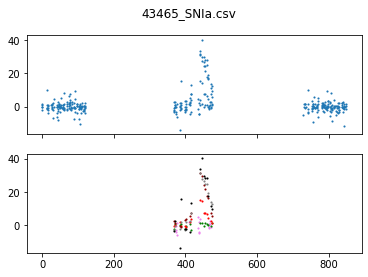

Mismatch Count = 0


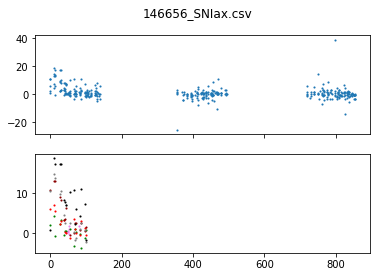

Mismatch Count = 0


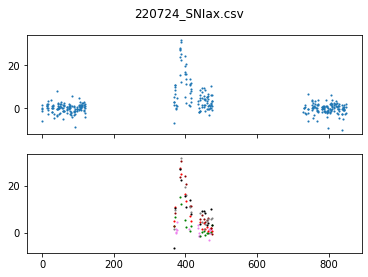

Mismatch Count = 0


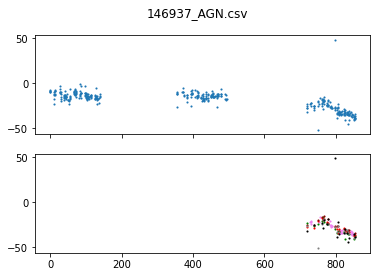

Mismatch Count = 0


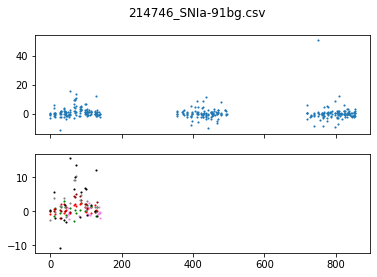

Mismatch Count = 0


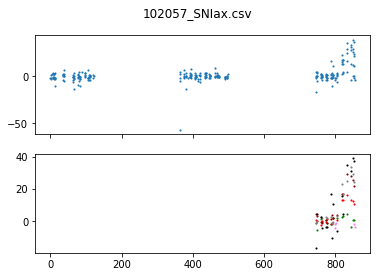

Mismatch Count = 0


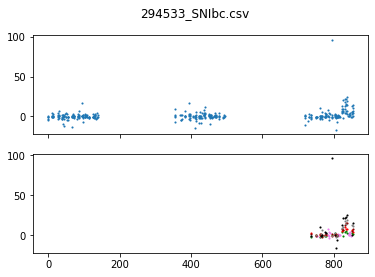

Mismatch Count = 0


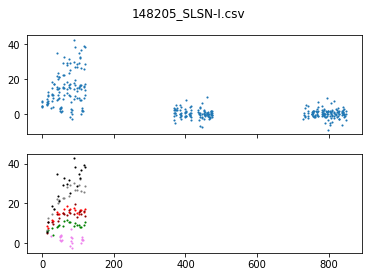

Mismatch Count = 0


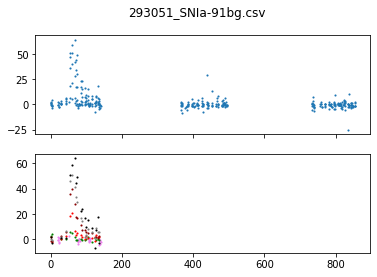

Mismatch Count = 0


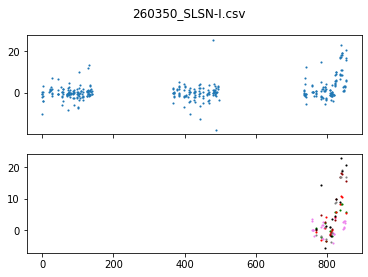

In [54]:
for file in random.sample(filels,10):
    f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
    df = pd.read_csv(file)
    df["mjd"] = df["mjd"] - df["mjd"][0]
    x = df["mjd"]
    y = df["flux"]
    ax1.scatter(x,y,s=1.2)
    imax = (df["flux"]/df["fluxerr"]).argmax()
    mjdmax = df["mjd"][imax]
    
    df.loc[(df["mjd"] >= mjdmax-100) & (df["mjd"] <= mjdmax+100),"sid_bool"] = 1
    mismatch_count = len(df.loc[df["detected_bool"] - df["sid_bool"] == 1])
    print(f"Mismatch Count = {mismatch_count}")
    
    subdf = df[df["sid_bool"] == 1].reset_index(drop=True)
    
    plot_allbands_df(subdf,ax=ax2)
    
    plt.suptitle(file.split("/")[-1])
    plt.show()

In [4]:
file=filels[2]

In [5]:
df = pd.read_csv(file)

In [6]:
df

,mjd,band,flux,fluxerr,detected_bool
0,59798.3205,r,1.292149,1.364357,0
1,59798.3281,g,-1.177428,1.156517,0
2,59798.3357,i,0.744584,1.770317,0
3,59798.3466,z,0.355209,2.610101,0
4,59798.3576,Y,-7.082202,5.379859,0
...,...,...,...,...,...
325,60652.1289,r,-1.032468,0.942344,0
326,60652.1365,g,0.847298,1.125169,0
327,60652.1441,i,-1.224090,1.380801,0
328,60652.1550,z,-1.530844,2.045706,0


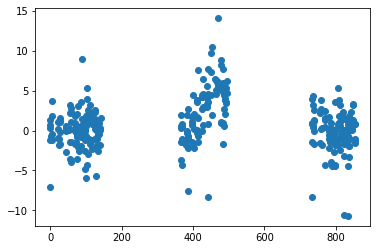

In [27]:
plt.scatter(x,y)

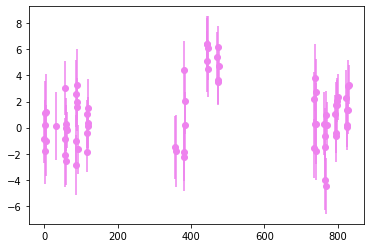

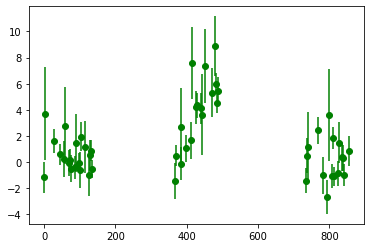

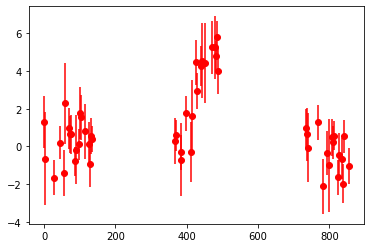

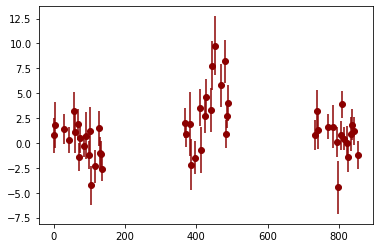

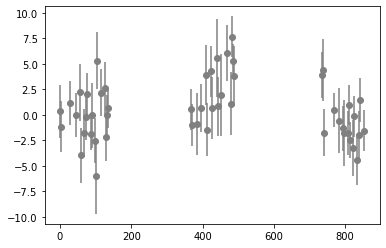

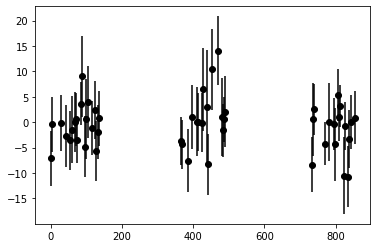

In [20]:
ugrizYcolors = ["violet","green","red","darkred","grey","black"]
for i,band in enumerate("ugrizY"):
    subdf = df[df["band"]==band].reset_index(drop=True)
    subdf["mjd"] = subdf["mjd"] - subdf["mjd"][0]
    x = subdf["mjd"]
    y = subdf["flux"]
    yerr = subdf["fluxerr"]
    plt.errorbar(x,y,yerr=yerr,fmt="o",label=band,color=ugrizYcolors[i])
    plt.show()

In [24]:
subdf["ratio"] = subdf["flux"]/subdf["fluxerr"]

In [25]:
subdf["ratio"]

0     0.947075
1    -0.262440
2    -1.792792
3     0.240790
4    -1.137891
5     1.067305
6     0.896806
7     0.649651
8     0.606010
9    -1.038482
10   -0.101302
11    0.126576
12    1.305522
13    1.300966
14    0.553280
15    0.131115
16   -0.792685
17    0.593385
18    0.593424
19    0.239580
20    0.702772
21   -0.338740
22   -0.363521
23    1.872960
24   -0.185739
25    0.822093
26    3.755447
27    3.080740
28    4.012657
29    2.268704
30    2.102336
31    3.718728
32    3.179921
33    5.947747
34    6.848378
35    3.192016
36    0.934552
37    0.447590
38   -0.031915
39    1.351637
40   -1.460134
41   -0.311382
42   -0.407330
43    0.498350
44    0.251489
45    0.740556
46   -1.746608
47   -0.384782
48   -0.598205
49   -1.919385
50    0.615106
51   -1.095638
Name: ratio, dtype: float64